<a href="https://colab.research.google.com/github/Lucka-Gianvechio/Adult_salary_class-Courseras-course-case/blob/main/Decision_Trees_Salary_class_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
data_header = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
               'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
               'hours-per-week', 'native-country', 'salary-class']
dataset = pd.read_csv("https://raw.githubusercontent.com/Lucka-Gianvechio/Adult_salary_class-Courseras-course-case/main/adult.data", index_col=False ,names = data_header )

dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##Rapida descrição das features

* age: idade do entrevistado
* workclass: classe de trabalho
* fnlwgt(final-weight): quantas pessoas são representadas pelo entrevistado de acordo com o senso
* education: grau de escolaridade
* education_num: numero de anos educado
* marital-state: estado civil
* occupation: profissão
* relationship: relacionamento
* race: etinia
* sex: sexo
* capital-gain/loss: lucro ou perda que se obtem com a venda de ações, títulos, imóveis, etc...
* hours-per-week: jornada de trabalho semanal
* native-country: país de nascimento
* salary-class(target): classe salarial (maior ou igual que, ou menor que 50k)

In [ ]:
for feat in data_header: print(feat.title(),f"\nNA's: {dataset[feat].isna().sum()}\n",dataset[feat].describe(include = "all"),"\n")

Age 
NA's: 0
 count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64 

Workclass 
NA's: 0
 count        32561
unique           9
top        Private
freq         22696
Name: workclass, dtype: object 

Fnlwgt 
NA's: 0
 count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64 

Education 
NA's: 0
 count        32561
unique          16
top        HS-grad
freq         10501
Name: education, dtype: object 

Education-Num 
NA's: 0
 count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64 

Marital-Status 
NA's: 0
 count                   32561
unique 

Não há valores faltantes no dataset.

##Classificando as variáveis

Algumas variáveis não serão de interesse, e portanto, serão removidas. São elas:
* fnlwgt, capital-gain, capital-loss

Temos como variáveis contínuas: 
* age, education-num, hours-per-week

Como variáveis categóricas temos:
* workclass ,education, marital-status, occupation, relationship, race, native-country

E por fim as binárias:
* sex, salary-class

In [ ]:
remover = ('fnlwgt', 'capital-gain', 'capital-loss')
binarias = ('sex', 'salary-class')
categoricas = ('workclass' ,'education', 'marital-status', 'occupation', 
               'relationship', 'race', 'native-country')

In [ ]:
#Removendo as variáveis
for feat in remover: del dataset[feat]
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [ ]:
#Separando as binárias em classe 0 e 1
for feat in binarias:
  dataset[feat] = dataset[feat].astype('category')
  dataset[feat] = dataset[feat].cat.codes

dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,Cuba,0


Nesse caso:
* sex: 0 = "female", 1 = "male"
* salary-class: 0 = "<=50k", 1 = ">50k"

In [ ]:
#Separando as dummies das categoricas
for feat in categoricas:
  dataset = pd.concat([dataset, pd.get_dummies(dataset[feat], prefix = feat)], axis=1)
  del dataset[feat]

dataset.head()

,age,education-num,sex,hours-per-week,salary-class,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,1,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13,1,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,1,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,1,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Agora temos um dataset com 105 colunas somente contínuas e binárias.

## Separando o conjunto de treino e teste

Primeiro, vamos separar nossas features em um dataframe 'X' e a target em outro 'y':

In [ ]:
y = dataset['salary-class']
X = dataset.copy()
X = X.drop(columns = ['salary-class'])

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary-class, dtype: int8

In [ ]:
X.head()

,age,education-num,sex,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,1,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13,1,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,1,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,1,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Agora separaremos em conjuntos de treino e teste na proporção 3:1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 420)

In [ ]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (24420, 104)
X_test:  (8141, 104)
y_train:  (24420,)
y_test:  (8141,)


## Treinando a árvore de decisão

Iremos utilizar o algoritimo de _decision tree_ do sklearn, utilizando os critério 'gini' e 'entropy' para calcular os pesos de cada _node_.

In [ ]:
arvore_gini = tree.DecisionTreeClassifier(random_state=420)
arvore_entropy = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 420)

E agora treinando ambos os modelos:

In [ ]:
arvore_gini.fit(X_train, y_train)
arvore_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=420, splitter='best')

Agora, a medição da acurácia dos modelos:

In [ ]:
score_gini = accuracy_score(y_test, arvore_gini.predict(X_test)) 
score_entropy = accuracy_score(y_test, arvore_entropy.predict(X_test)) 

print(f"Acc Score por gini: {score_gini}")
print(f"Acc Score por entropia: {score_entropy}\n")

Acc Score por gini: 0.7856528681980101
Acc Score por entropia: 0.7846701879375998



Apesar de muito parecidos, os scores, como esperado, diferem entre si dependendo do critério utilizado no treino.

Vamos visualizar o modelo que utilizou o critério gini.

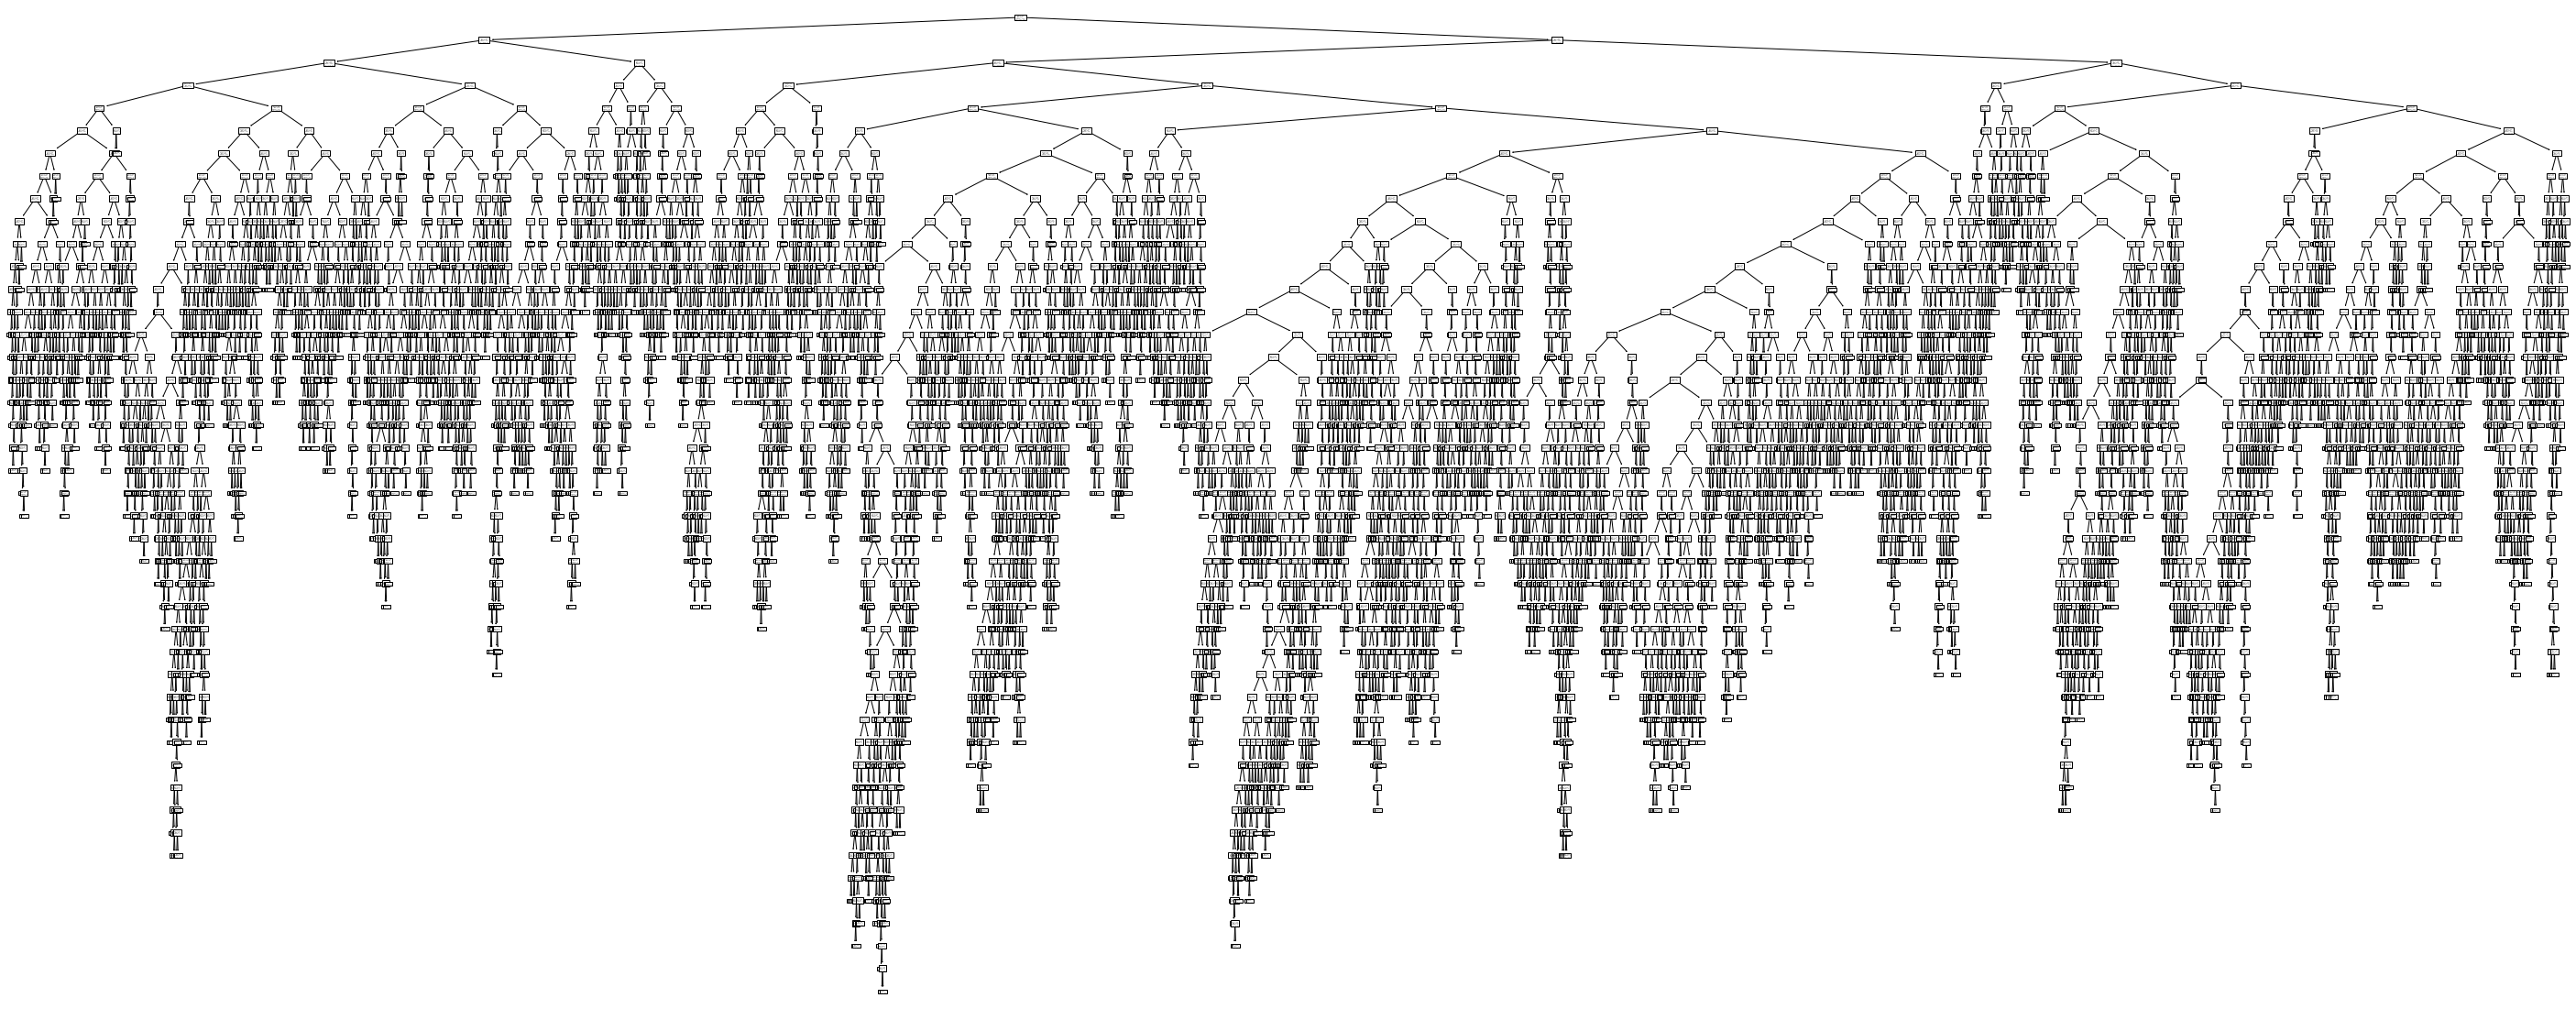

In [ ]:
plt.figure(figsize=(50, 20))
a = tree.plot_tree(arvore_gini)

plt.show()

De fato, temos uma arvore muito complexa. Isso em alguns casos pode indicar q temos um caso de overfitting em nosso modelo. Uma das soluções conhecidas para se diminuir a complexidade do modelo é o método de poda, onde se limita o número de ramificações, consequentemente deixando o modelo menos especializado. 

Vamos verificar a acurácia do modelo ao conjunto de treino:

In [ ]:
print(accuracy_score(y_train, arvore_gini.predict(X_train)))

0.9713759213759213


Uma acurácia de 0.97 é um bom indicativo de que nosso modelo está mais especializado do que deve. Vamos testar alguns valores para o parametro "min_sample_split" (default = 2) e tentar encontrar um valor que diminua o overfitting e ao mesmo tempo maximize nossa acurácia no conjunto de testes.

In [ ]:
sizes = [2, 10, 50, 100, 500, 1000, 5000, 10000, 15000, 20000]
score_treino = []
score_teste = []

for tam in sizes:
  #Vamos treinar uma decision tree (gini) para cada tamanho e verificar o score
  modelo = tree.DecisionTreeClassifier(random_state=420,
                                       min_samples_leaf = tam)
  modelo.fit(X_train, y_train)

  score_treino.append(accuracy_score(y_train, modelo.predict(X_train)))
  score_teste.append(accuracy_score(y_test, modelo.predict(X_test)))


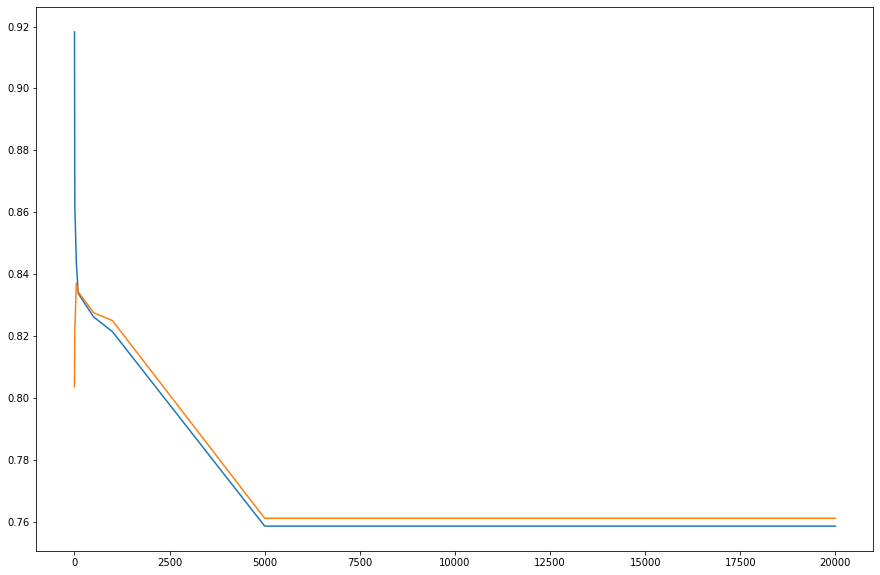

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(sizes, score_treino)
plt.plot(sizes, score_teste)

plt.show()

É possivel notar uma melhora, onde a acurácia do treino diminuí para valores em torno de 0.84 e 0.82, enquanto a acurácia do conjunto de teste aumenta quando utilizamos o valor 100 para o valor mínimo. Vamos então usar esse valor para o parâmetro e gerar uma nova árvore de decisões.

In [ ]:
modelo_2 = tree.DecisionTreeClassifier(random_state=420, min_samples_leaf = 100)
modelo_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=420, splitter='best')

In [ ]:
print("Score do treino: ", accuracy_score(y_train, modelo_2.predict(X_train)))
print("Score do teste: ", accuracy_score(y_test, modelo_2.predict(X_test)))

Score do treino:  0.8337428337428338
Score do teste:  0.8342955410883184


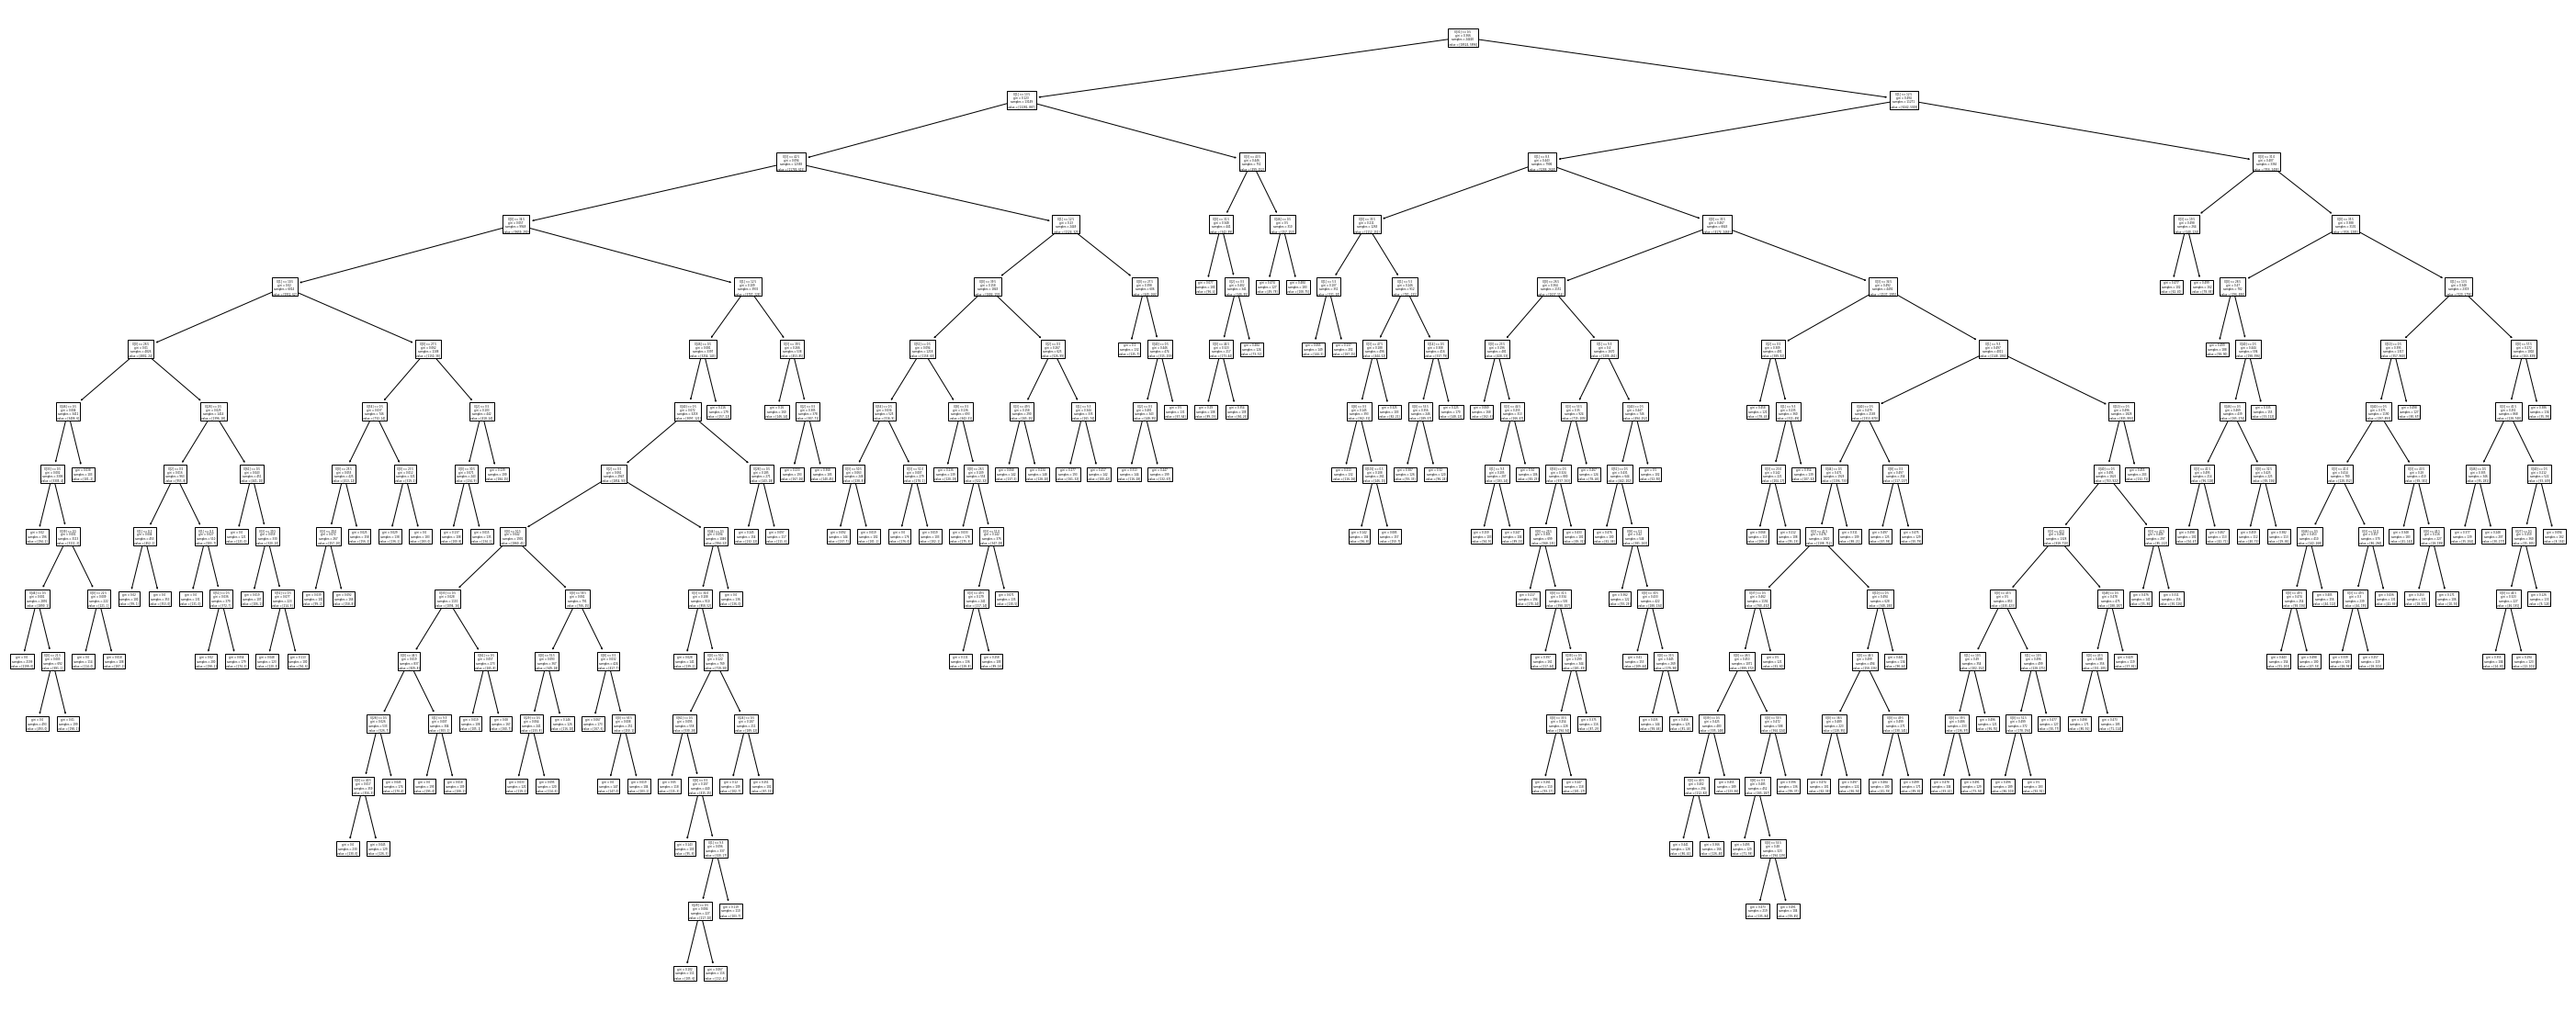

In [ ]:
plt.figure(figsize=(50, 20))
a = tree.plot_tree(modelo_2)
plt.show()

É nítido que nossa árvore está bem menos complexa, isso fez ainda com que nossa acurácia aumentasse com os testes, melhorando a performance do nosso classificador.